<a href="https://colab.research.google.com/github/rezjaq/SVIP/blob/main/Week_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Clone repository YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.67 MiB | 16.26 MiB/s, done.
Resolving deltas: 100% (11704/11704), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 22.7 MB/s eta 0:00:00


In [3]:
import torch
from IPython.display import display, Image
from PIL import Image as PILImage
import cv2
import numpy as np
from pathlib import Path


In [4]:
# Load model YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-11 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 188MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Saving kantor.jpg to kantor (1).jpg


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-11 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded


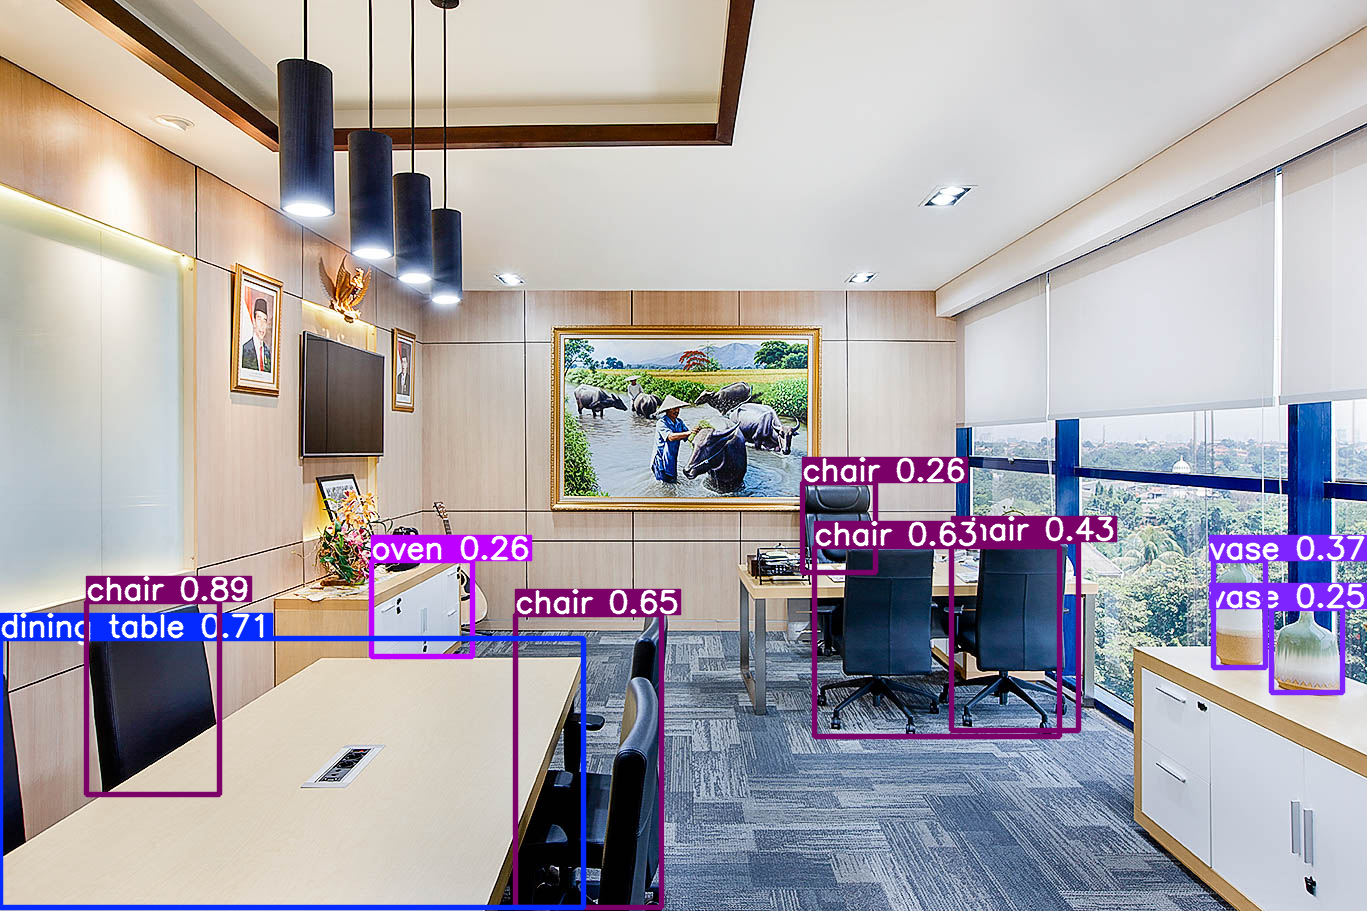

In [6]:
import torch
from PIL import Image as PILImage
from google.colab import files
import matplotlib.pyplot as plt

# Unggah file gambar
uploaded = files.upload()

# Mendapatkan nama file dari hasil upload
file_name = next(iter(uploaded))

# Baca gambar
img = PILImage.open(file_name)

# Load model YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Jalankan deteksi objek menggunakan YOLOv5
results = model(img)

# Menampilkan hasil deteksi
results.show()  # Menampilkan gambar dengan bounding box pada objek yang terdeteksi


### **Jika menggunakan video**

In [7]:
from google.colab import files

# Unggah file video
uploaded = files.upload()


Saving macet.mp4 to macet.mp4


In [8]:
import cv2
import os

# Mendapatkan nama file video dari hasil upload
video_path = next(iter(uploaded))

# Membuka video menggunakan OpenCV
cap = cv2.VideoCapture(video_path)

# Tentukan codec dan buat VideoWriter untuk menyimpan hasil output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec untuk format MP4
output_path = 'output_video.mp4'
out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# Proses setiap frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Deteksi objek pada frame menggunakan YOLOv5
    results = model(frame)

    # Render hasil deteksi (menambah bounding box pada frame)
    results.render()

    # Tulis frame hasil deteksi ke video output
    out.write(results.ims[0])  # Menggunakan ims[0] sebagai ganti imgs[0]

# Selesaikan dan tutup
cap.release()
out.release()

print("Proses deteksi objek selesai. Video output disimpan sebagai:", output_path)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

Proses deteksi objek selesai. Video output disimpan sebagai: output_video.mp4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [9]:
from google.colab import files

# Unduh video hasil deteksi
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>